## imports

In [1]:
import pandas as pd
import vaex as vx
import numpy as np
import matplotlib.pyplot as plt

## read CSVs via vaex

In [2]:
holidays=vx.from_csv("../data/raw/holidays_events.csv", parse_dates=['date'], infer_datetime_format=True)
stores=vx.from_csv("../data/raw/stores.csv")
transactions=vx.from_csv("../data/raw/transactions.csv", parse_dates=['date'], infer_datetime_format=True)
oil=vx.from_csv("../data/raw/oil.csv", parse_dates=['date'], infer_datetime_format=True)
train=vx.from_csv("../data/raw/train.csv", parse_dates=['date'], infer_datetime_format=True)
test=vx.from_csv("../data/raw/test.csv", parse_dates=['date'], infer_datetime_format=True)

In [3]:
holidays.date

Expression = date
Length: 350 dtype: datetime64[ns] (column)
------------------------------------------
  0  2012-03-02 00:00:00.000000000
  1  2012-04-01 00:00:00.000000000
  2  2012-04-12 00:00:00.000000000
  3  2012-04-14 00:00:00.000000000
  4  2012-04-21 00:00:00.000000000
               ...                
345  2017-12-22 00:00:00.000000000
346  2017-12-23 00:00:00.000000000
347  2017-12-24 00:00:00.000000000
348  2017-12-25 00:00:00.000000000
349  2017-12-26 00:00:00.000000000

In [4]:
# with vx.open 'date'=date32[day], has NotImplementedError: Cannot convert date32[day] when doing joins, try with vx.from_csv insteal
# holidays=vx.open("../data/raw/holidays_events.csv")
# stores=vx.open("../data/raw/stores.csv")
# transactions=vx.open("../data/raw/transactions.csv")
# oil=vx.open("../data/raw/oil.csv")
# train=vx.open("../data/raw/train.csv")
# test=vx.open("../data/raw/test.csv")


## Descriptive analysis of each DF

In [5]:
df_list = {'holidays':holidays, 'stores':stores, 'oil':oil, 'transactions':transactions, 'train':train, 'test':test}
for k,v in df_list.items():
    print(f"DF: {str(k)}, shape: {v.shape}, columns: {list(v.columns)}")
    v.info()

DF: holidays, shape: (350, 6), columns: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']


DF: stores, shape: (54, 5), columns: ['store_nbr', 'city', 'state', 'type', 'cluster']


DF: oil, shape: (1218, 2), columns: ['date', 'dcoilwtico']


DF: transactions, shape: (83488, 3), columns: ['date', 'store_nbr', 'transactions']


DF: train, shape: (3000888, 6), columns: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']


DF: test, shape: (28512, 5), columns: ['id', 'date', 'store_nbr', 'family', 'onpromotion']


In [6]:
# import dtale
# d = dtale.show(train.to_pandas_df())
# d.open_browser()

In [7]:

# d = dtale.show(transactions.to_pandas_df())
# d.open_browser()

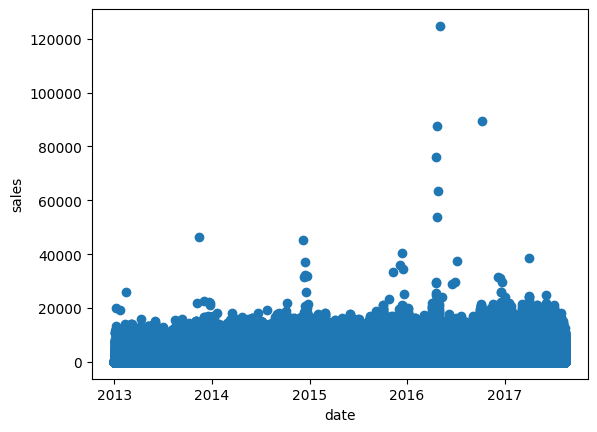

In [8]:
train.viz.scatter(train.date, train.sales, length_check=False );

DF: holidays, shape: (350, 6), columns: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']<br>
DF: oil, shape: (1218, 2), columns: ['date', 'dcoilwtico']<br>
DF: transactions, shape: (83488, 3), columns: ['date', 'store_nbr', 'transactions']

DF: train, shape: (3000888, 6), columns: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']<br>
DF: stores, shape: (54, 5), columns: ['store_nbr', 'city', 'state', 'type', 'cluster']<br>
DF: test, shape: (28512, 5), columns: ['id', 'date', 'store_nbr', 'family', 'onpromotion']

In [9]:
txn_holidays = transactions.join(holidays, on='date', lsuffix='_tx', rsuffix='_h', allow_duplication=True)
txn_holidays.shape

(85007, 9)

In [10]:
txn_holidays_df = txn_holidays.to_pandas_df()
txn_holidays_df.set_index('date_tx', inplace=True)
txn_holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85007 entries, 2013-01-01 to 2016-11-12
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store_nbr     85007 non-null  int64         
 1   transactions  85007 non-null  int64         
 2   date_h        13911 non-null  datetime64[ns]
 3   type          13911 non-null  object        
 4   locale        13911 non-null  object        
 5   locale_name   13911 non-null  object        
 6   description   13911 non-null  object        
 7   transferred   13911 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 5.8+ MB


In [11]:
train_stores = train.join(stores, on='store_nbr', lsuffix='_tr', rsuffix='_st',)
train_stores.shape

(3000888, 11)

In [12]:
train_stores_df = train_stores.to_pandas_df()
train_stores_df.set_index('date', inplace=True)
train_stores_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr_tr  int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   store_nbr_st  int64  
 6   city          object 
 7   state         object 
 8   type          object 
 9   cluster       int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 251.8+ MB


### error when joining pandas 

Cannot execute code, session has been disposed. Please try restarting the Kernel.
The Kernel crashed while executing code in the the current cell or a previous cell. Please review the code in the cell(s) to identify a possible cause of the failure. Click here for more info. View Jupyter log for further details.

In [13]:
train_stores=vx.from_pandas(train_stores_df.reset_index())

In [14]:
train_stores

#,date,id,store_nbr_tr,family,sales,onpromotion,store_nbr_st,city,state,type,cluster
0,2013-01-01 00:00:00.000000000,0,1,AUTOMOTIVE,0.0,0,1,Quito,Pichincha,D,13
1,2013-01-01 00:00:00.000000000,1,1,BABY CARE,0.0,0,1,Quito,Pichincha,D,13
2,2013-01-01 00:00:00.000000000,2,1,BEAUTY,0.0,0,1,Quito,Pichincha,D,13
3,2013-01-01 00:00:00.000000000,3,1,BEVERAGES,0.0,0,1,Quito,Pichincha,D,13
4,2013-01-01 00:00:00.000000000,4,1,BOOKS,0.0,0,1,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
"3,000,883",2017-08-15 00:00:00.000000000,3000883,9,POULTRY,438.133,0,9,Quito,Pichincha,B,6
"3,000,884",2017-08-15 00:00:00.000000000,3000884,9,PREPARED FOODS,154.553,1,9,Quito,Pichincha,B,6
"3,000,885",2017-08-15 00:00:00.000000000,3000885,9,PRODUCE,2419.729,148,9,Quito,Pichincha,B,6
"3,000,886",2017-08-15 00:00:00.000000000,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.0,8,9,Quito,Pichincha,B,6


In [15]:
txn_holidays=vx.from_pandas(txn_holidays_df.reset_index())
txn_holidays

#,date_tx,store_nbr,transactions,date_h,type,locale,locale_name,description,transferred
0,2013-01-01 00:00:00.000000000,25,770,2013-01-01 00:00:00.000000000,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-02 00:00:00.000000000,1,2111,NaT,--,--,--,--,nan
2,2013-01-02 00:00:00.000000000,2,2358,NaT,--,--,--,--,nan
3,2013-01-02 00:00:00.000000000,3,3487,NaT,--,--,--,--,nan
4,2013-01-02 00:00:00.000000000,4,1922,NaT,--,--,--,--,nan
...,...,...,...,...,...,...,...,...,...
"85,002",2016-11-12 00:00:00.000000000,49,3242,2016-11-12 00:00:00.000000000,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False
"85,003",2016-11-12 00:00:00.000000000,50,3057,2016-11-12 00:00:00.000000000,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False
"85,004",2016-11-12 00:00:00.000000000,51,1696,2016-11-12 00:00:00.000000000,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False
"85,005",2016-11-12 00:00:00.000000000,53,1274,2016-11-12 00:00:00.000000000,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


In [16]:
# convert to vaex dataframe as kernel would crash with pandas dataframe
df_full = train_stores.join(txn_holidays, 
                    left_on='date', right_on='date_tx',
                    how='left', 
                    allow_duplication=True,
                    lsuffix='_tr_st', 
                    rsuffix='_txn_hols'
                    )

: 

: 